In [16]:
import pandas as pd
from pathlib import Path
import re
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import matplotlib_inline
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [36]:
DATA_DIR = Path("/data/grammar/coedit")

In [37]:
coedit = pd.read_parquet(DATA_DIR.joinpath("raw", "train.parquet"))

In [38]:
coedit.head()

,_id,task,src,tgt
0,1,gec,Remove all grammatical errors from this text: ...,"For example, countries with a lot of deserts c..."
1,2,gec,Improve the grammaticality: As the number of p...,"As the number of people grows, the need for a ..."
2,3,gec,Improve the grammaticality of this sentence: B...,Besides some technological determinists that a...
3,4,gec,Remove all grammatical errors from this text: ...,Safety is one of the crucial problems that man...
4,5,gec,Fix grammaticality in this sentence: On one ha...,"On the one hand, more and more viruses and hac..."


In [39]:
coedit.task.unique()

array(['gec', 'neutralize', 'simplification', 'paraphrase', 'coherence',
       'clarity'], dtype=object)

In [40]:
coedit.task.value_counts()

task
gec               19823
paraphrase        15370
simplification    11440
coherence         10616
neutralize        10570
clarity            1252
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Grammar Tasks'}, xlabel='Count', ylabel='Task'>

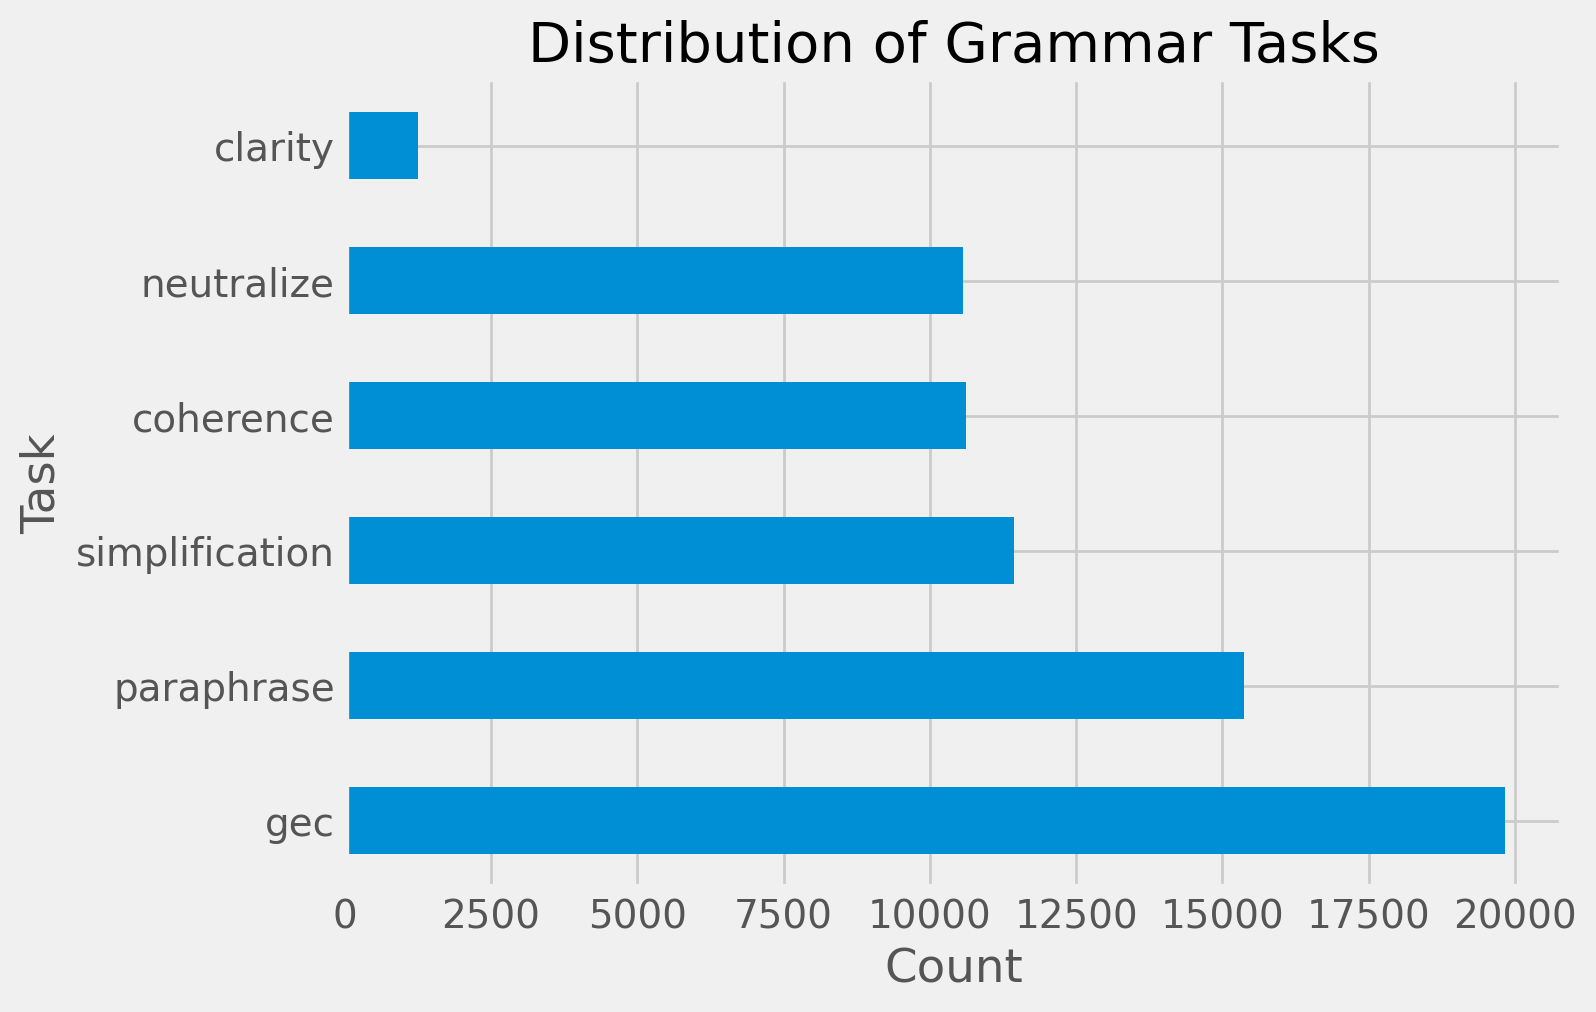

In [41]:
# plot the value counts of the tasks and make the labels horizontal
coedit.task.value_counts().plot(kind="barh", xlabel="Count",
                                ylabel="Task", 
                                title="Distribution of Grammar Tasks",
                                rot=0, figsize=(7, 5))

In [42]:
coedit.src.apply(lambda s: len(s)).max()

884

In [43]:
coedit.src.apply(lambda s: len(s)).mean()

127.42111740093527

In [44]:
prompts = coedit.src.str.extract(r"^(.*?):")

In [48]:
prompts.rename(columns={0: "prompt"}, inplace=True)

In [50]:
# concatenate the prompts to the dataframe
prompts = pd.concat([coedit["task"], prompts], axis=1)

In [55]:
# sample 5 from each task
prompts.groupby("task").sample(2)

,task,prompt
68460,clarity,Use clearer wording
68655,clarity,Make the sentence clear
57765,coherence,Fix coherence in this sentence
67787,coherence,Improve the consistency of the text
4979,gec,Fix errors in this text
13127,gec,Remove grammar mistakes
28548,neutralize,Make this paragraph more neutral
26584,neutralize,Neutralize this sentence
55342,paraphrase,Write a paraphrase for the sentence
47067,paraphrase,Rewrite this text


In [56]:
coedit["prompts"] = coedit.src.str.extract(r"^(.*?):")

In [57]:
coedit["input_text"] = coedit.src.str.extract(r":(.+)")